# Predicting back pain with `sklearn` and `GridSearchCV`
I'm going to look at some medical biometric data, and then predict whether an individual is going to sugger from abnormal back pain that was seen in the patients previously using these measurements. It is quite a small data set, so I will be doing some preprocessing and model building and comparison `sklearn`; I'm hoping that this will act as a good reference point for people using `sklearn`. 

I'm going to focus on these main algorithms for binary classification problems:
1. Decision trees
2. Logisitic regression 
3. Support Vector Machines 

If you are interested in seeing a kernel written in `R` on this dataset that uses `caret` then I have written one [here](https://www.kaggle.com/willcanniford/predicting-lower-back-pain-using-caret-in-r). I wrote that `R` one first, and during my Python learning, I have expanded that and decided to produce this kernel as well to transfer the findings and models into a different programming language.   

Using `GridSearchCV` here I implement cross-validation search across parameters for certain `sklearn` models and then investigate the information provided by this feedback to try and show the advantage of exploring different metrics when choosing final model parameters. 

In [1]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import numpy as np 
import pandas as pd 

## Reading in and cleaning our data 
Firstly, we are going to read in the data and clean it so that we are able to work with it with more clarity, and to make the model building stage easier. You'll see that the last column of the data that is given to us contains the names of the other columns in the set. We can use this information to name the columns, and then drop this 'meta' column from the data frame. 

In [2]:
raw_data = pd.read_csv('../input/Dataset_spine.csv')

# View the column names given in the last column
raw_data.iloc[:, -1].head(20)

0                                                   NaN
1                                                   NaN
2     Prediction is done by using binary classificat...
3                                                   NaN
4                                                   NaN
5            Attribute1  = pelvic_incidence  (numeric) 
6                   Attribute2 = pelvic_tilt (numeric) 
7         Attribute3 = lumbar_lordosis_angle (numeric) 
8                  Attribute4 = sacral_slope (numeric) 
9                 Attribute5 = pelvic_radius (numeric) 
10     Attribute6 = degree_spondylolisthesis (numeric) 
11                    Attribute7= pelvic_slope(numeric)
12                     Attribute8= Direct_tilt(numeric)
13                  Attribute9= thoracic_slope(numeric)
14                  Attribute10= cervical_tilt(numeric)
15                    Attribute11=sacrum_angle(numeric)
16                Attribute12= scoliosis_slope(numeric)
17                                              

While we are cleaning the data, and renaming the columns using the last column's information, we will also split the data into feature variables and response. This is going to make it easier for us later when we are actually modelling the data. With `sklearn` it requires us to have separated the labels from the data and pass them in separately.  

In [3]:
# Remove the last column that only contains meta data for us
data = raw_data.iloc[:, :-1]

# View the data prior to renaming the columns for comparison
print(data.head())

        Col1       Col2       Col3    ...          Col11    Col12  Class_att
0  63.027818  22.552586  39.609117    ...     -28.658501  43.5123   Abnormal
1  39.056951  10.060991  25.015378    ...     -25.530607  16.1102   Abnormal
2  68.832021  22.218482  50.092194    ...     -29.031888  19.2221   Abnormal
3  69.297008  24.652878  44.311238    ...     -30.470246  18.8329   Abnormal
4  49.712859   9.652075  28.317406    ...     -16.378376  24.9171   Abnormal

[5 rows x 13 columns]


In [4]:
# Rename the columns in place using a dictionary and the information found in the 13th column
meta_column_names = {"Col1" : "pelvic_incidence", "Col2" : "pelvic_tilt",
                     "Col3" : "lumbar_lordosis_angle","Col4" : "sacral_slope", 
                     "Col5" : "pelvic_radius","Col6" : "degree_spondylolisthesis", 
                     "Col7" : "pelvic_slope","Col8" : "direct_tilt", 
                     "Col9" : "thoracic_slope", "Col10" :"cervical_tilt", 
                     "Col11" : "sacrum_angle", "Col12" : "scoliosis_slope"}

# Rename the columns using the above dictionary, and replace the existing data object with inplace = True
data.rename(columns = meta_column_names, inplace = True)

Let's split the data into features (`X`) and response (`y`). Note that we have already removed the 'meta' column, so we don't have to worry about that, and can just take the final column of the dataset that represents whether the patient suffered from abnormal back pain or not (`Class_att`).  

Let's also just check that the dimensions of the two variables match up. We need the features to have the same number of observations/rows as the labels that are contained with `y`. 

In [5]:
# Features
X = data.iloc[:, :-1]
# Response
y = data.iloc[:, -1]

print(X.shape)
print(y.shape)

(310, 12)
(310,)


That all looks good (we know that we have 310 observations, and 12 features); we can have a final look at the data as a whole, but just keep in mind that we are going to mainly working with the `X` and `y` variables that we have defined. 

In [6]:
data.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


# Visualising the data 
One of the traditional starting points of any analysis, is the visualisation of the data to try and get a feel for the values, and the interactions between some of the features. 

## Visualising the correlations between the feature variables with `.corr()`
Now that we have cleaned up the column names, we can have a quick look at the diferent feature variables present in the data and their interactions, as well as try and visualise our information prior to building and comparing our different prediction models. A useful correlation visualisation is using `.corr()` on the dataset. If you have a high number of feature variables, then it is probably for the best to filter the columns prior to using the visualisation, otherwise it might become too cluttered to be informative. 

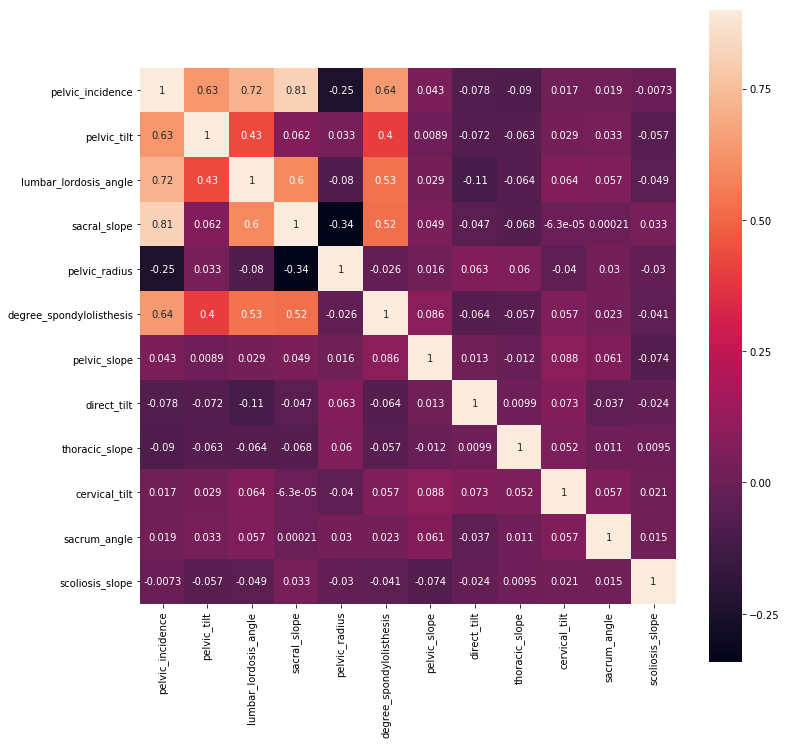

In [7]:
correlations = X.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(correlations, square=True, cbar=True, annot=True, vmax=.9);

## Further visualising correlations with `seaborn`
We can expand on our previous plot using the `sns.pairplot()` function from `seaborn`. We can see that the first 6 columns seem to hold higher correlations between them, while the remaining variables are seemingly unrelated, Let's have a look at the pairplot of those first 6 columns. 

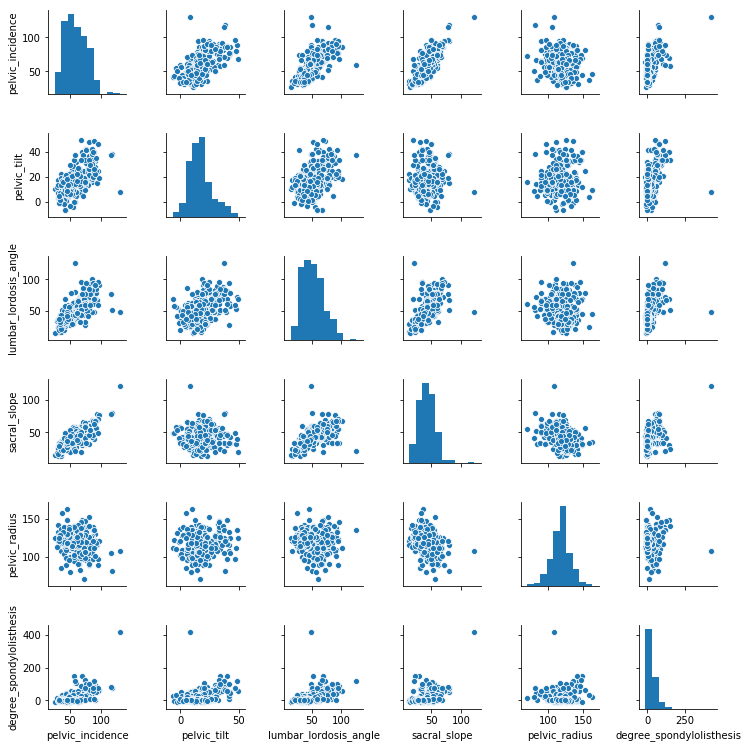

In [8]:
sns.pairplot(X.iloc[:, :6], height = 1.75)
plt.show()

## Visualising differences between groups
While it is important to note the correlations between variables, our main goal is to predict whether an individual observation is likely to suffer from normal or abnormal pain. This means that is probably more informative to look through the feature variables with them split by group so that we find particular feature variables that are of immediate interest to us regarding predictive power. 

There are further techniques that involve the combination of feature variables to improve the predictive power of a model; this could either be multiplicative between certain variables or additive. I may explore this at a later date to see if we can further improve the models' performance. 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


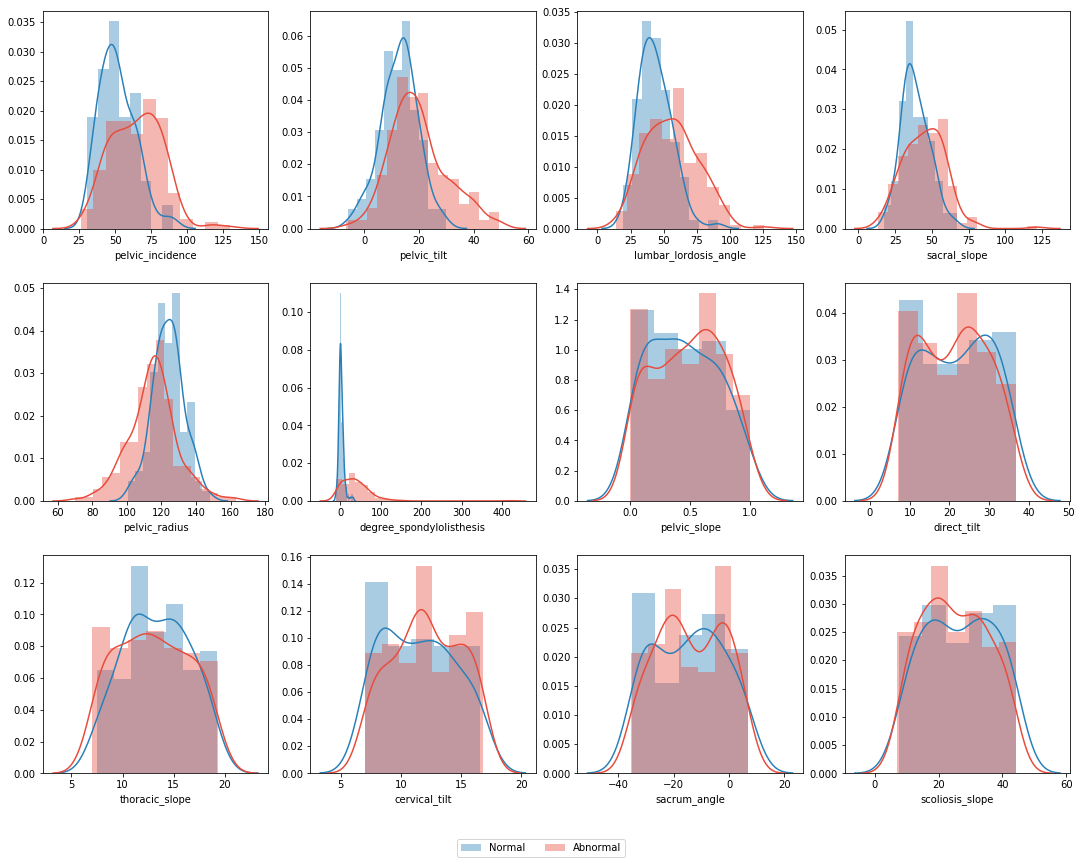

In [9]:
fg, ax = plt.subplots(ncols=4, nrows=3, sharex=False, sharey=False, figsize=(15,12))
fg.tight_layout()
# Add h spacing and space at the bottom for the legend
plt.subplots_adjust(hspace=0.25, bottom = 0.1)

# If we reshape the 2D numpy array that is returned from subplots for the axes then we can loop through without worrying about dimensions
for index, axes in enumerate(ax.reshape(-1)):
    normal = sns.distplot(data[data.Class_att == 'Normal'].iloc[:, index], ax=axes, color='#2980b9', label = 'Normal')
    abnormal = sns.distplot(data[data.Class_att == 'Abnormal'].iloc[:, index], ax=axes, color='#e74c3c', label = 'Abnormal')
    
# For this to work you have to have named the lines AND given labels 
# Get the handles and lines from the final axes - we can do this in this case because the lines are the same for every subplot
h, l = axes.get_legend_handles_labels()
fg.legend(h, l, loc='lower center', ncol = 2)
plt.show()

The largest disparity that we see for a single variable between 'Normal' and 'Abnormal' is 'degree_spondylolisthesis'; let's visualise that on its own using a swarm plot. 

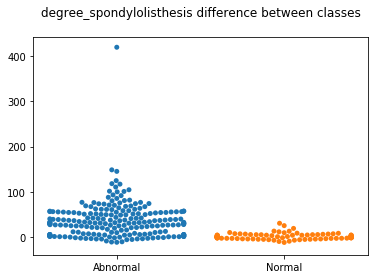

In [10]:
sns.swarmplot(y='degree_spondylolisthesis', x='Class_att', data=data)
plt.title('degree_spondylolisthesis difference between classes\n')
plt.xlabel('')
plt.ylabel('')
plt.show()

While this highlights the difference in levels between the two classes, it also makes apparent that we have more "Abnormal" cases than "Normal" in this dataset. 

# Training our models
Let's start having a look at predicting the values that we are interested in. 

## Scaling the data using `StandardScaler` 
I'm going to scale the feature variables below using the `StandardScaler` from `sklearn.preprocessing`. This won't necessarily change the result of effectiveness of every algorithm, but those that are distance based will be regularised so that the scale of the variable doesn't impact it's respective weight in the classification stage. i.e. those variables that are generally larger will hold more weight when the classification is made if the data isn't scaled. We want all the variables on the same scale. 

If we were later to recieve more data, as you would imagine a model like this might be used in a real-world application, then you can use the same `StandardScaler` object to scale that incoming data to be used with our model. This would likely be wrapped into a single package or cleaning function that you could reuse as the data was fed into the system. 

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.14708636  0.50136873 -0.6651769  ...  1.1671291  -1.19658726
   1.71236843]
 [-1.24586434 -0.74876898 -1.45300075 ...  1.67955123 -0.94032533
  -0.91394145]
 [ 0.4843695   0.46793218 -0.09926175 ...  1.63596949 -1.22717809
  -0.61568643]
 ...
 [ 0.05520137  0.51561812 -0.31097748 ... -1.05158278  1.44337397
  -0.69303204]
 [-0.88582307 -0.88565951 -0.55861259 ... -0.75264852  1.62384854
   0.77376463]
 [-1.54892681 -1.24785954 -0.82539423 ...  0.62174631  1.29742294
   1.43371339]]


In [12]:
type(X_scaled)

numpy.ndarray

You'll note here that a `numpy.ndarray` has been returned, rather than a data frame. We have also lost our column names. If you want to have the scaled data in a `pd.DataFrame` then you'll have to rebuild it using the column names pulled from the original `X` data frame. I've written an example below of how you might do this if you wanted to easily visualise etc. 

In [13]:
scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
scaled_df['Class_att'] = y
scaled_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0.951630,-1.015066,0.434293,1.167129,-1.196587,1.712368,Abnormal
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,-0.202553,-0.977816,1.316291,1.679551,-0.940325,-0.913941,Abnormal
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0.006694,0.639127,1.302680,1.635969,-1.227178,-0.615686,Abnormal
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,-0.363213,0.259554,-0.105211,-0.176157,-1.345020,-0.652989,Abnormal
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,0.246670,1.643094,0.851472,-1.059666,-0.190502,-0.069858,Abnormal


## Train test split
Even though this dataset is small, I think that it is still best practice to implement a training and test split of the data to try and get a better indication of out-of-sample prediction after the model has been built.

Now that we can see that we have scaled the features, and encoded the response, we can create our training and test splits of the data using `sklearn.model_selection.train_test_split`.  We are going to be performing a simple 75% train, 25% test split with our data. I have used a `random_state` to ensure that the resuls are consistent throughout the kernel, and that every time it is run the results are going to be the same for everyone that views this. 

I am also going to quickly demonstrate the difference between using `stratify` during the class to `train_test_split` to make sure that the classes are even between both the training and test sets. It is a small point here, but may be more important with other data sets to avoid the training set being unbalanced, or the test set not containing any rare positive cases for example. 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 1000)

In [15]:
proportion_train = round(len(y_train[y_train == 'Abnormal'])/len(y_train)*100, 2)
proportion_test = round(len(y_test[y_test == 'Abnormal'])/len(y_test)*100, 2)
print('Train case proportion: {}%'.format(proportion_train))
print('Test case proportion:  {}%'.format(proportion_test))
print('Difference between test and train sets: {}%'.format(round(np.abs(proportion_train - proportion_test), 2)))

Train case proportion: 68.97%
Test case proportion:  64.1%
Difference between test and train sets: 4.87%


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 1000, stratify = y)

In [17]:
proportion_train = round(len(y_train[y_train == 'Abnormal'])/len(y_train)*100, 2)
proportion_test = round(len(y_test[y_test == 'Abnormal'])/len(y_test)*100, 2)
print('Train case proportion: {}%'.format(proportion_train))
print('Test case proportion:  {}%'.format(proportion_test))
print('Difference between test and train sets: {}%'.format(round(np.abs(proportion_train - proportion_test), 2)))

Train case proportion: 67.67%
Test case proportion:  67.95%
Difference between test and train sets: 0.28%


We can see that our classes are more evenly balanced between the train and test set when we specify the response variable in the `stratify` argument. Now that we have our training and testing sets all finalised, we can get on with training and evaluating our models. 

## Decision Tree model using `DecisionTreeClassifier`
An incredibly popular model for binomial prediction problems in the decision tree, so it seems like a good place to start. This is just a singular tree with default hyper parameters so isn't necessary reflective of the ideal model or performance that could be achieved using this particular algorithm. 

In [18]:
# Import decision trees and accuracy metric 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

We have imported our `DecisionTreeClassifier`, and now can fit the model using training data, and measure the model's effectiveness using the test data. 

In [19]:
# We are going to be doing this a lot, so better to define a function
def print_accuracy(accuracy_score, score_text=False):
    """
    Take an accuracy score between 0 and 1 and print output to screen cleanly 
    """
    clean_accuracy = accuracy_score*100.0
    if score_text:
        clean_text = score_text.strip() + ' '
        print('{}{:.2f}%'.format(clean_text, clean_accuracy))
    else:
        print('{:.2f}%'.format(clean_accuracy))

In [20]:
tree_model = DecisionTreeClassifier(random_state = 1000).fit(X_train, y_train)

# Predict on the test set and get the accuracy using the known values 
tree_pred = tree_model.predict(X_test)

print_accuracy(accuracy_score(y_test, tree_pred), 'Decision tree accuracy:')

Decision tree accuracy: 79.49%


Note that not specifying any hyperparameters with `DecisionTreeClassifier` basically means it will keep growing until all the nodes are pure, which will likely result in huge overfitting issues. We should do some hyperparameter training to see if there is a more optimum combination of hyperparameters that will produce a better model for accuracy on our test set. 

### Tuning our `DecisionTreeClassifier` using `GridSearchCV` 
In addition to our test-train split we are going to perform cross validation. This takes a number of folds from the data and trains a model on one section before testing on the other, on the training subset. The final model that is returned is a model that uses the best hyperparameters for that full testing set and is trained on the full set. This internal test from within the cross validation set is sometimes referred as the validation set; it is the performance on this set that will give us insight into the performance of the model on unseen examples outside of the training examples.  

We can then test this further because we will have already separated out a final test set for us to use; this might lead to some interesting results because the data size is so small, but I think that it is good practice so will do it regardless. 

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
# Define our parameter grid that will be looped through to test our hyperparameters
param_grid = {'max_depth': [i for i in range(1, 11)], 
              'max_features': [i for i in range(1, 8)], 
              'min_samples_leaf': [i for i in range(1, 11)]}

grid = GridSearchCV(DecisionTreeClassifier(random_state = 1000), param_grid, cv=10, return_train_score = True)

Once the grid object has been created, we can fit it using our train data to create a model and find the best hyperparameters according to the out-of-sample tests done during the cross-validation. 

In [23]:
grid.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1000,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

By accessing our `grid` object we can find out the best out-of-sample score that we obtained, as well as the parameters that provided that; the `best_score_` is defined as _mean cross-validated score of the best_estimator_, so we can see what the average score across all cross-validations for our 'optimum' parameters is. This might act as a good indication of the model's future performance on unseen data. Further to that, we can access the best estimator model through the `best_estimator_` portion of the object. I'll use that to predict our test set and see what accuracy score we get.  

In [24]:
print("Best Score: {}%".format(round(grid.best_score_*100.0, 2)))
print("Best params: {}".format(grid.best_params_))

Best Score: 82.76%
Best params: {'max_depth': 4, 'max_features': 6, 'min_samples_leaf': 3}


In [25]:
print_accuracy(accuracy_score(y_test, grid.best_estimator_.predict(X_test)), 'Decision Tree Classifier:')

Decision Tree Classifier: 76.92%


The accuracy that we saw on the test set wasn't as good as what we might have expected given the cross-validation score that we had; but it is still good, and not a bad starting point! 

## Investigating the performance using `cv_results_`
If we wanted to know more about the performance of the model during the process, then we could take a look for ourselves into the scores that were generated during this process. Perhaps we didn't want the particular set of hyperparameters that had the best mean score, but instead wanted a set of hyperparameters that was very consistent in its predictive power so we might better be able to predict performance in our testing set. Since the training times are recorded as well, we are able to observe the tradeoff between certain parameter settings and the performance of the model. More information about this can be found in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). 

It should also be noted that we can define a scorer of our choosing, and it might be more appropriate to use a balanced accuracy measure here to avoid scores being higher purely due to picking the majority class each time; this is something that I may implement in the next version of the kernel. 

If you have set `return_train_score = True` then the results of the cross-validation will be stored as below:

In [26]:
keys = []
shapes = []
examples = []
for key in list(grid.cv_results_.keys()):
    keys.append(key)
    shapes.append(len(grid.cv_results_.get(key)))
    examples.append(grid.cv_results_.get(key)[0])

df_results_info = pd.DataFrame({'size': shapes, 'example': examples}, index = keys)
df_results_info

,size,example
mean_fit_time,700,0.000832295
std_fit_time,700,0.000200323
mean_score_time,700,0.000422716
std_score_time,700,8.45947e-05
param_max_depth,700,1
param_max_features,700,1
param_min_samples_leaf,700,1
params,700,"{'max_depth': 1, 'max_features': 1, 'min_sampl..."
split0_test_score,700,0.708333
split1_test_score,700,0.666667


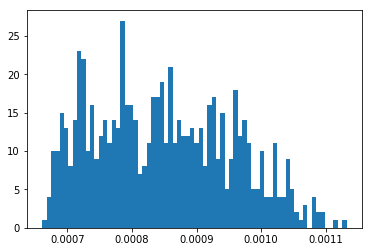

In [27]:
plt.hist(grid.cv_results_.get('mean_fit_time'), bins = 70);plt.show()

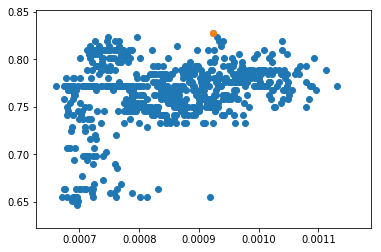

In [28]:
mean_fit_times = grid.cv_results_.get('mean_fit_time')
mean_test_scores = grid.cv_results_.get('mean_test_score')
max_score = np.argmax(mean_test_scores)

plt.scatter(mean_fit_times, mean_test_scores)
plt.xlim(min(mean_fit_times)*0.95, max(mean_fit_times*1.05))
plt.scatter(mean_fit_times[max_score], mean_test_scores[max_score])
plt.show()

Above I have highlighted the singular point that represents the highest mean test score. To continue what I was saying, it might be the case that you want to investigate the performance of a model computationally, which might be a consideration when you are training on larger models, or have a flow of data that requires retraining periodically. 

In [29]:
max_depth = grid.cv_results_.get('param_max_depth').astype(int)
max_features = grid.cv_results_.get('param_max_features').astype(int)
min_samples_leaf = grid.cv_results_.get('param_min_samples_leaf').astype(int)
mean_fit_times = grid.cv_results_.get('mean_fit_time')
mean_test_scores = grid.cv_results_.get('mean_test_score')

params_df = pd.DataFrame({'max_depth' : max_depth, 
                          'max_features' : max_features, 
                          'min_samples_leaf' : min_samples_leaf,
                          'mean_fit_time' : mean_fit_times,
                          'mean_test_score' : mean_test_scores})

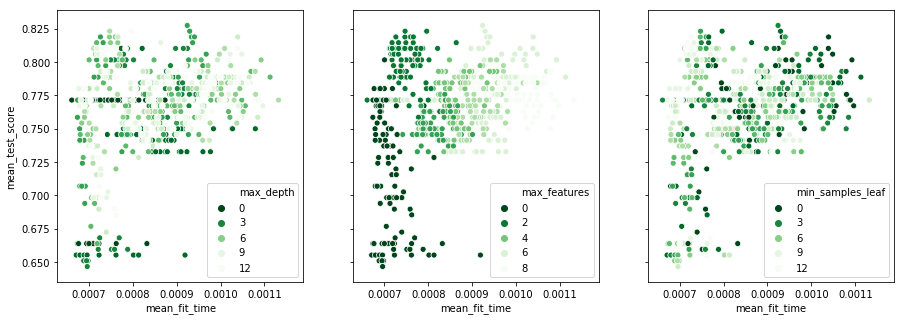

In [30]:
fig, ax = plt.subplots(nrows= 1, ncols = 3, figsize = (15,5), sharey=True, sharex=True)
plt.xlim(min(mean_fit_times)*0.95, max(mean_fit_times*1.05))

features = ['max_depth', 'max_features', 'min_samples_leaf']
axes = ax.flatten()

for idx in range(3):
    sns.scatterplot(y = 'mean_test_score', x = 'mean_fit_time', hue = features[idx], data = params_df, ax = axes[idx], palette='Greens_r')
    
plt.show()

__Note:__ if the above graphs look to have any major outliers, then this might be due to the particular run of the grid when this notebook was rendered. 

Looking these graphs, sorted and coloured by the 3 parameters that were part of our grid, we can see that `max_features` seems to have a strong impact on the fitting time of a model, and that by limiting that to lower values provides using with a sizeable computational performance improvement, whereas the other two have a more spread set across the `mean_fit_time` in comparison; they still have some patterns that we can see.  

`min_samples_leaf` tends to take longer the lower it is which makes sense given that the lower this parameter is, then the deeper the final model will be. `max_depth` also appears to show that the higher the depth, then the longer the model takes to train. 

## Logistic Regression model with `LogisticRegression`
Now we have built a model using a decision tree, we can build another model using logistic regression for comparison. 

In [31]:
from sklearn.linear_model import LogisticRegression

 By altering the `penalty` attribute of the `LogisiticRegression` we can change the type of regularisation that the model uses. This can have an impact on the effectiveness and efficiency of the model, and could be included as one of the hyperparameters that we tune when we run the cross-validation and `gridSearch`.

In [32]:
param_grid = {'penalty': ['l1', 'l2']}
grid = GridSearchCV(LogisticRegression(random_state = 1000, solver = 'liblinear'), param_grid, cv=10, return_train_score=True)

In [33]:
grid.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1000, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2']}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [34]:
print("Best Score: {}".format(grid.best_score_))
print("Best params: {}".format(grid.best_params_))

Best Score: 0.8448275862068966
Best params: {'penalty': 'l2'}


In [35]:
print_accuracy(accuracy_score(y_test, grid.best_estimator_.predict(X_test)), 'Best logisitic regression grid score:')

Best logisitic regression grid score: 84.62%


Just for the sake of comparison and because we are only using a small parameter grid (two levels), I will create a model using the `l1` regularisation penalty to show how it differs from `l2`. Here lies an example of the benefit of stating the `random_state` argument when creating the `LogisticRegression` model. 

In [36]:
# Solver suppresses the warnings: more information about which solver for which problems can be found in the docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
log_reg_l1 = LogisticRegression(penalty='l1', solver = 'liblinear', random_state=1000)
log_model_l1 = log_reg_l1.fit(X_train, y_train)
y_pred_l1 = log_model_l1.predict(X_test)
print(log_model_l1.coef_)

print_accuracy(accuracy_score(y_test, y_pred_l1), 'L1 Regularised test accuracy:')

[[ 0.         -0.75736403  0.16146864  0.87439214  1.01984968 -5.45466424
  -0.08546988 -0.12790196  0.00840986 -0.15448371 -0.0113614   0.2861093 ]]
L1 Regularised test accuracy: 83.33%


In [37]:
# Having a look at the l2 regularisation, which isn't capable of fully removing features
log_reg_l2 = LogisticRegression(penalty='l2', solver = 'liblinear', random_state=1000)
log_model_l2 = log_reg_l2.fit(X_train, y_train)
y_pred_l2 = log_model_l2.predict(X_test)
print(log_model_l2.coef_)

print_accuracy(accuracy_score(y_test, y_pred_l2), 'L2 Regularised test accuracy:')

[[ 0.05337676 -0.70103349  0.10189634  0.59123473  0.91577249 -3.66037515
  -0.11397455 -0.15064631  0.03416852 -0.15493269 -0.03204881  0.24631742]]
L2 Regularised test accuracy: 84.62%


Note how L1 regularisation of the model acts as feature selection as it has reduced one coefficient of our features to 0 and thus removed them from the model. This is a benefit to using the L1 regularisation as in this way it is capable of feature selection and maintaining the simplicity of the model. 

In [38]:
grid.best_estimator_.coef_

array([[ 0.05337676, -0.70103349,  0.10189634,  0.59123473,  0.91577249,
        -3.66037515, -0.11397455, -0.15064631,  0.03416852, -0.15493269,
        -0.03204881,  0.24631742]])

In [39]:
log_model_l2.coef_

array([[ 0.05337676, -0.70103349,  0.10189634,  0.59123473,  0.91577249,
        -3.66037515, -0.11397455, -0.15064631,  0.03416852, -0.15493269,
        -0.03204881,  0.24631742]])

In [40]:
log_model_l2.coef_ == grid.best_estimator_.coef_

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True]])

This is just to show to that the model returned by the grid serach is the same as that returned by the model that we built externally afterwards.  

Let's take a look at the results that were captured during the grid search results and see how the models performed at every split. 

In [41]:
test_splits = [i for i in list(grid.cv_results_.keys()) if i.endswith('test_score') and i.startswith('split')]
test_split_results = {}
penalty = list(grid.cv_results_.get('param_penalty'))

for split in test_splits:
    test_split_results[split] = list(grid.cv_results_.get(split))
    
df_test_splits = pd.DataFrame(test_split_results, index = penalty)
df_test_splits.columns = [i.replace('_test_score', '') for i in df_test_splits.columns]

In [42]:
df_test_splits

,split0,split1,split2,split3,split4,split5,split6,split7,split8,split9
l1,0.833333,0.833333,0.833333,0.875000,0.875000,0.869565,0.739130,0.863636,0.909091,0.772727
l2,0.833333,0.833333,0.833333,0.833333,0.833333,0.869565,0.869565,0.818182,0.909091,0.818182


In [43]:
df_test_splits.loc['l1'] >= df_test_splits.loc['l2']

split0     True
split1     True
split2     True
split3     True
split4     True
split5     True
split6    False
split7     True
split8     True
split9    False
dtype: bool

We can see that `L1` regularisation actually performed better or equal in 80% of the splits that we performed, and that the average performance was only marginally less overall for the test sets. 

In [44]:
list(grid.cv_results_.get('mean_test_score'))

[0.8405172413793104, 0.8448275862068966]

In [45]:
long_test_splits = pd.DataFrame(df_test_splits.unstack().reset_index())
long_test_splits.columns = ['split', 'penalty', 'score']
long_test_splits

,split,penalty,score
0,split0,l1,0.833333
1,split0,l2,0.833333
2,split1,l1,0.833333
3,split1,l2,0.833333
4,split2,l1,0.833333
5,split2,l2,0.833333
6,split3,l1,0.875000
7,split3,l2,0.833333
8,split4,l1,0.875000
9,split4,l2,0.833333


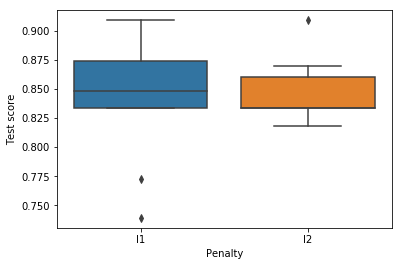

In [46]:
sns.boxplot(x='penalty', y="score", data=long_test_splits)
plt.xlabel('Penalty')
plt.ylabel('Test score')
plt.show()

We can see a tighter clustering of the `L2` test scores, while the `L1` results appear to be generally higher but the average brought down by two outliers; with more cross-validation passes this might have shown that `L1` was the more effective model. 

## Support Vector Machine model with `SVC`
When considering using support vector machines, we are going to look at the performance of two different types: Polynomial and RBF. You can see how these are defined below, as well as their performance against the test set that we have defined.  

Support vector machines can be a good method of creating interesting relationships by introducing polynomial features that allow for the creating a line that separates the two classes. RBF (radial basis function) methods are more popular, and are density based. The gamma hyperparameter is important in the battle of fighting overfitting. A higher value of gamma will make a tighter fit around the data points, but this means that it won't necessarily generalise well, whereas accuracy is likely to fall with a lower gamma value, but it might mean that performance generalises better to unseen observations.  

In [47]:
# Import support vector machines
from sklearn.svm import SVC

In [48]:
poly_model = SVC(kernel = 'poly', gamma = 'auto', random_state = 1000).fit(X_train, y_train)
rbf_model = SVC(kernel = 'rbf', gamma = 'auto', random_state = 1000).fit(X_train, y_train)

poly_pred = poly_model.predict(X_test)
print_accuracy(accuracy_score(y_test, poly_pred), 'Polynomial kernel accuracy:')

rbf_pred = rbf_model.predict(X_test)
print_accuracy(accuracy_score(y_test, rbf_pred), 'RBF kernel accuracy:')

Polynomial kernel accuracy: 67.95%
RBF kernel accuracy: 76.92%


With the default settings we can see that the RBF performed much better, let's have a look and see whether tweaking the value of gamma will make a noticeable difference to the performance on the test set. 'auto' for gamma uses a value of 1/n_features by [default](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), so lets produce a range that is around that to see if there are any improvements to be made.   

When we are using a grid search technique then we are selecting the best hyperparameters based on their performance on generalising outside of the data on which they have been trained, so a lower gamma makes sense as we want to avoid overfitting the data to the training set. 

In [49]:
param_grid = {'gamma': np.arange(0, 0.25, 0.01)}
grid = GridSearchCV(SVC(random_state = 1000, kernel = 'rbf'), param_grid, cv=5, return_train_score=True)
grid.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1000,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [50]:
print("Best Score: {}".format(grid.best_score_))
print("Best params: {}".format(grid.best_params_))
print(1/12)

Best Score: 0.8232758620689655
Best params: {'gamma': 0.06}
0.08333333333333333


By default the gamma would have been 1/12, or ~0.08. Using the `GridSearch` we are able to see that a lower gamma value of 0.06 might perform better on unseen data; we can see how it performs on the test that we have by manually specifying that gamma value of 0.06 and rebuilding the model. 

In [51]:
rbf_model_2 = SVC(kernel = 'rbf', gamma = 0.03, random_state = 1000).fit(X_train, y_train)
rbf_pred_2 = rbf_model_2.predict(X_test)

print_accuracy(accuracy_score(y_test, rbf_pred), 'Original RBF kernel accuracy:')
print_accuracy(accuracy_score(y_test, rbf_pred_2), 'RBF kernel accuracy with gamma of 0.06:')

Original RBF kernel accuracy: 76.92%
RBF kernel accuracy with gamma of 0.06: 78.21%


Our `GridSearch` has yielded good results, and changing that gamma value has meant that the performance is slightly better on our test set, going from **76.92%** to **78.21%**. 

In [52]:
gammas = list(grid.cv_results_.get('param_gamma'))
mean_test_scores = list(grid.cv_results_.get('mean_test_score'))
mean_train_times = list(grid.cv_results_.get('mean_fit_time'))

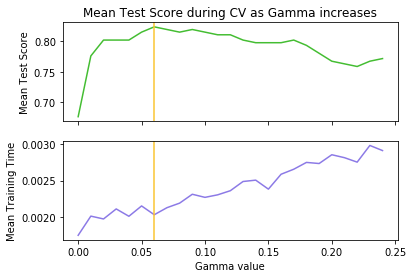

In [53]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, sharex = True, sharey = False)
axs = axes.flatten()

plt.sca(axs[0])
sns.lineplot(gammas, mean_test_scores, color = '#44bd32')
plt.axvline(0.06, color = '#fbc531')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score during CV as Gamma increases')

plt.sca(axs[1])
sns.lineplot(x=gammas, y=mean_train_times, color="#8c7ae6")
plt.ylabel('Mean Training Time')
plt.axvline(0.06, color = '#fbc531')
plt.xlabel('Gamma value')
plt.show()

It looks as though we have a good value for gamma in terms of both the test score that was achieved via the cross-validation, and the training time for the model. 

# Conclusions
We can see that early into this investigation that both logistic regression models are performing better than our decision tree and our support vector machines; at least with the tuning that I have done. I think this is a good example of where throwing complexity at a problem doesn't always yield results. Sometimes this is important when you have large amounts of data, and have issues training computationally; this isn't a problem with our small dataset but could prove something to consider when the data size becomes larger so looking at the training information that can be provided through the `cv_results_` of a `GridSearchCV` object is useful, and I hope that I've shown some of the ways in which that might shape the final decision of choosing hyperparameters.  

__Coming soon__
- Other algorithms to explore for hyperparameter tuning - Ensemble methods
- Binary problem accuracy methods

If you've found this useful then please consider leaving an upvote or a comment. Please let me know if you see anything that I could improve or if you have constructive feedback. 


If you are interested in seeing a similar kernel written in`R` on this dataset that uses `caret` then I have written one with just that [here](https://www.kaggle.com/willcanniford/predicting-lower-back-pain-using-caret-in-r).
